In [6]:
import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib import cm
import time
#%matplotlib inline
import multiprocessing
from itertools import product
#from circuit import *

In [7]:
def plot_boxplot(data,savepath= ".",name=None,p_value=None, ax=None):

    if ax is None:
        fig = plt.figure(figsize = (5,5),dpi=80)
        ax = fig.add_subplot(111)

    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    bp = ax.boxplot(data, patch_artist=True)
    
    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='k', linewidth=1)
        # change fill color
        box.set( facecolor = '#DCDCDC' )
    
    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='k', linewidth=2)
    
    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='k', linewidth=2)
    
    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='k', linewidth=2)
    
    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='k', markerfacecolor = '#DCDCDC', alpha=0.5)

    x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = np.array(data).max() , 1, 'k'
 
    if p_value is not None:
        plt.text((x1+x2)*.5, y+h, 'p=%.6f'%(p_value), ha='center', va='bottom', color=col)

    ax.set_xticklabels(["before (199)", "after (499)"])
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xlabel("condition", fontsize = 16)
    #plt.xlim((90,170))
    #plt.ylim((0.7,0.78))
    plt.ylabel("average selectivity", fontsize = 16)
    plt.tight_layout()
    plt.savefig('%s/boxplot_%s.eps'%(savepath,name))   


In [8]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# Parameters
dt = .05                                       # Simulation time step\n",
nsteps = 25                                   # Number of simulation time steps\n",
N = 100                                        # Number of neurons per population\n",
I_1 = np.ones((N))*1.5+np.random.randn(N)       # Input to Population 1\n",
I_2 = np.ones((N))*1+np.random.randn(N)       # Input to Population 1\n",
W = 20.0#abs(np.random.randn(N))               # Weight\n",
PV = 20.0

sample_resolution = 1 # For recording rates\n",

def phi(_x):
    r_max=1.0
    #print(_x)
    _x[_x<=0] = 0 # rectify at 0
    _x[_x>r_max] = r_max
    return _x
    # return sigmoid function value    \n",
    #return 1.0/(1.0+np.exp(-x))\n",
    
seeds = [763,82375,838,903489,5786,78634,38,276,9405,2716,409,852,847,736,945]
lr = []
ul = []
sel = []
avg_before_selectivity = []
avg_final_selectivity = []
all_avg_selectivities = []

for seed in seeds:
    np.random.seed(seed)
    r_1 = abs(np.random.randn(N))
    r_2 = abs(np.random.randn(N))
    rates_1 = []
    rates_2 = []
    selectivity = []
    avg_selectivity = []
    rates_1.append(r_1.copy())
    rates_2.append(r_2.copy())

    for t in range(int(nsteps/dt)):
        if (t>200) and (t < 300):
            # early: 200-300
            # entire: 200-500
            dr_1 = -r_1 + phi(-W*r_2 + I_1 - PV)
            dr_2 = -r_2 + phi(-W*r_1 + I_2 - PV)
        else: 
            dr_1 = -r_1 + phi(-W*r_2 + I_1 - 0.0)
            dr_2 = -r_2 + phi(-W*r_1 + I_2 - 0.0)
            

        r_1 += dt*dr_1
        r_2 += dt*dr_2
        
        rates_1.append(r_1.copy())
        rates_2.append(r_2.copy())
        selectivity.append(abs(np.array(rates_1)[t,:]-np.array(rates_2)[t,:]))
        avg_selectivity.append(np.mean(abs(np.array(rates_1)[t,:]-np.array(rates_2)[t,:])))
        
    points_lower_right = np.shape(np.nonzero(np.array(rates_1)[-1,:]>0.2))[1]
    points_upper_left = np.shape(np.nonzero(np.array(rates_2)[-1,:]>0.2))[1]
    
    before_selectivity = abs(np.array(rates_1)[199,:]-np.array(rates_2)[199,:])
    final_selectivity = abs(np.array(rates_1)[-1,:]-np.array(rates_2)[-1,:])
    avg_final_selectivity.append(np.mean(final_selectivity))
    avg_before_selectivity.append(np.mean(before_selectivity))
    all_avg_selectivities.append(avg_selectivity)

    lr.append(points_lower_right)
    ul.append(points_upper_left)
    sel.append(selectivity)

In [11]:
lr_5 = lr
ul_5 = ul
sel_5= sel


In [12]:
rate_2 = np.arange(10.0)
rate_1 = np.ones((10))
print(rate_1)
print(rate_2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [13]:
rate_2
rate_3 = 4.0*rate_2
print(rate_3)
rate_1 += rate_3
print(rate_1)

[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36.]
[ 1.  5.  9. 13. 17. 21. 25. 29. 33. 37.]


In [14]:
rate_1 = np.ones((10))
rate_1 += phi(rate_3)
print(rate_1)

[1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [15]:
print(np.shape(sel))
np.mean(np.mean(sel,1))

(15, 500, 100)


0.642680259438345

In [16]:
print(lr_5)
print(lr_10)
print(lr_20)
print(lr_30)
print(ul_5)
print(ul_10)
print(ul_20)
print(ul_30)
print(np.mean(np.array(lr_5)/np.array(ul_5)))
print(np.mean(np.array(lr_10)/np.array(ul_10)))
print(np.mean(np.array(lr_20)/np.array(ul_20)))
print(np.mean(np.array(lr_30)/np.array(ul_30)))
print(np.std(np.array(lr_5)/np.array(ul_5)))
print(np.std(np.array(lr_10)/np.array(ul_10)))
print(np.std(np.array(lr_20)/np.array(ul_20)))
print(np.std(np.array(lr_30)/np.array(ul_30)))

[68, 67, 66, 66, 67, 67, 66, 67, 65, 66, 66, 66, 66, 67, 67]


NameError: name 'lr_10' is not defined

In [ ]:
plt.plot(np.array(rates_1)[:,0])

In [ ]:
plt.plot(np.array(rates_1))
plt.plot(np.array(rates_2),linestyle='dashed')

In [ ]:
plt.figure()
for i,rate_1 in enumerate(np.array(rates_1).T):
    plt.plot(rate_1,color=cm.cividis(i/100.0))
    plt.plot(np.array(rates_2)[:,i],color=cm.cividis(i/100.0),linestyle='dashed')
plt.xlabel('time',fontsize=16)
plt.ylabel('activity',fontsize=16)
#plt.ylim(-0.1,3.0)
plt.savefig('./rates_over_time_I1earlyPVact_laserPV20_linact.png', bbox_inches='tight')

In [ ]:
print(avg_before_selectivity)
print(avg_final_selectivity)


In [ ]:
plt.figure()
for i,select in enumerate(np.array(selectivity).T):
    plt.plot(select,color=cm.cividis(i/100.0))
plt.plot(avg_selectivity,color='k',linewidth=2.0,label='average')
plt.xlabel('time',fontsize=16)
plt.ylabel('selectivity',fontsize=16)
plt.title('one example, different lines are different circuits')
#plt.title("selectivity before: %.2f; selectivity after: %.2f"%(avg_before_selectivity, avg_final_selectivity))
#plt.ylim(-0.1,1.5)
plt.legend()
plt.savefig('./selectivity_over_time_I1earlyPVact_laserPV20_linact.png', bbox_inches='tight')

In [ ]:
plt.figure()
plt.subplot(121)
for i,avg_select in enumerate(np.array(all_avg_selectivities)):
    plt.plot(avg_select)
    print(i)
plt.xlabel('time',fontsize=16)
plt.ylabel('average selectivity',fontsize=16)
plt.title('different lines are different seeds')
#plt.title("selectivity before: %.2f; selectivity after: %.2f"%(avg_before_selectivity, avg_final_selectivity))
ax = plt.subplot(122)
plot_boxplot([avg_before_selectivity, avg_final_selectivity],name='early_activation',ax=ax)
plt.ylim(0.93,1.01)
plt.savefig('./all_avg_selectivities_over_time_I1earlyPVact_laserPV20_linact.png', bbox_inches='tight')

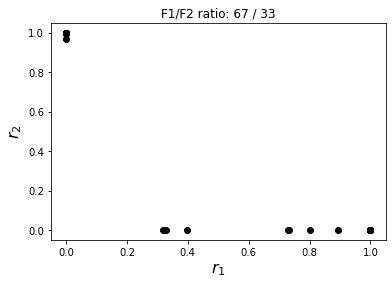

In [93]:
points_lower_right = np.shape(np.nonzero(np.array(rates_1)[-1,:]>0.2))[1]
points_upper_left = np.shape(np.nonzero(np.array(rates_2)[-1,:]>0.2))[1]

plt.figure()
plt.scatter(np.array(rates_1)[-1,:],np.array(rates_2)[-1,:],color='k')
plt.xlabel(r'$r_1$',fontsize=16)
plt.ylabel(r'$r_2$',fontsize=16)
plt.title('F1/F2 ratio: %d / %d' %(points_lower_right,points_upper_left))
plt.savefig('./r_1_versus_r_2_100_earlyPVact_laserPV20.png', bbox_inches='tight')

In [78]:
print(np.nonzero(np.array(rates_1)[-1,:]>0.2))
print(np.nonzero(np.array(rates_2)[-1,:]<0.2))
print(np.shape(np.nonzero(np.array(rates_1)[-1,:]>0.2)))


(array([ 0,  2,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 18, 22, 23,
       24, 25, 26, 27, 29, 32, 33, 35, 37, 39, 40, 41, 44, 46, 49, 50, 51,
       52, 53, 54, 55, 56, 59, 60, 61, 63, 64, 65, 68, 69, 71, 72, 73, 74,
       75, 76, 78, 79, 82, 84, 85, 86, 87, 89, 93, 96, 97, 98, 99]),)
(array([ 0,  2,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 18, 22, 23,
       24, 25, 26, 27, 29, 32, 33, 35, 37, 39, 40, 41, 44, 46, 49, 50, 51,
       52, 53, 54, 55, 56, 59, 60, 61, 63, 64, 65, 68, 69, 71, 72, 73, 74,
       75, 76, 78, 79, 82, 84, 85, 86, 87, 89, 93, 96, 97, 98, 99]),)
(1, 66)


In [79]:
print(np.nonzero(np.array(rates_1)[-1,:]<0.2))
print(np.nonzero(np.array(rates_2)[-1,:]>0.2))
print(np.shape(np.nonzero(np.array(rates_2)[-1,:]>0.2)))


(array([ 1,  3, 12, 17, 19, 20, 21, 28, 30, 31, 34, 36, 38, 42, 43, 45, 47,
       48, 57, 58, 62, 66, 67, 70, 77, 80, 81, 83, 88, 90, 91, 92, 94, 95]),)
(array([ 1,  3, 12, 17, 19, 20, 21, 28, 30, 31, 34, 36, 38, 42, 43, 45, 47,
       48, 57, 58, 62, 66, 67, 70, 77, 80, 81, 83, 88, 90, 91, 92, 94, 95]),)
(1, 34)


In [595]:
r_0 = np.ones((10))
r_0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [596]:
r_0 += W*r_2

ValueError: operands could not be broadcast together with shapes (10,) (100,) (10,) 

In [ ]:
r_0